# Classification 2
sebelumnya:
- Logistic Regression
- K-Nearest Neighbor

kali ini:
- Naive Bayes
- Decision Tree
- Random Forest
- Support Vector Machine (SVM)

In [73]:
# import package disini
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use(['ggplot'])

import seaborn as sns

# import package2 dari sklearn disini
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.datasets import load_digits, load_wine

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

# untuk visualisasi decision tree
import sklearn.tree as tree
import pydotplus
from six import StringIO 
from IPython.display import Image
# install Graphviz

In [2]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


# Naive Bayes
algoritma klasifikasi dengan asumsi kalau 1 fitur itu independen denga fitur lainnya.

di contoh berikut misalnya, asumsinya adalah cuaca dan temperatur tidak memberi efek ke satu sama lain.



In [3]:
# siapin data
# First Feature
weather=['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny',
'Rainy','Sunny','Overcast','Overcast','Rainy']

# Second Feature
temp=['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']

# Label or target varible
play=['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']

df = pd.DataFrame({"weather":weather, "temperature":temp, "play":play})
df

,weather,temperature,play
0,Sunny,Hot,No
1,Sunny,Hot,No
2,Overcast,Hot,Yes
3,Rainy,Mild,Yes
4,Rainy,Cool,Yes
5,Rainy,Cool,No
6,Overcast,Cool,Yes
7,Sunny,Mild,No
8,Sunny,Cool,Yes
9,Rainy,Mild,Yes


In [4]:
# data preparation
# missing value, invalid value, tipe data, 
# encoding, scaling, split jadi training dan testing data

# encoding, mengubah data tipe string jadi angka
encoder = LabelEncoder()

df["weather_en"] = encoder.fit_transform(df["weather"])
print("Class untuk weather:", encoder.classes_)

df["temp_en"] = encoder.fit_transform(df["temperature"])
print("Class untuk temperature:", encoder.classes_)

df["play_en"] = encoder.fit_transform(df["play"])
print("Class untuk play:", encoder.classes_)

display(df)

Class untuk weather: ['Overcast' 'Rainy' 'Sunny']
Class untuk temperature: ['Cool' 'Hot' 'Mild']
Class untuk play: ['No' 'Yes']


,weather,temperature,play,weather_en,temp_en,play_en
0,Sunny,Hot,No,2,1,0
1,Sunny,Hot,No,2,1,0
2,Overcast,Hot,Yes,0,1,1
3,Rainy,Mild,Yes,1,2,1
4,Rainy,Cool,Yes,1,0,1
5,Rainy,Cool,No,1,0,0
6,Overcast,Cool,Yes,0,0,1
7,Sunny,Mild,No,2,2,0
8,Sunny,Cool,Yes,2,0,1
9,Rainy,Mild,Yes,1,2,1


In [5]:
features = df[["weather_en", "temp_en"]]
target = df["play_en"]

In [6]:
# membuat dan melatih model
model = GaussianNB().fit(features, target)

              precision    recall  f1-score   support

           0       0.60      0.60      0.60         5
           1       0.78      0.78      0.78         9

    accuracy                           0.71        14
   macro avg       0.69      0.69      0.69        14
weighted avg       0.71      0.71      0.71        14



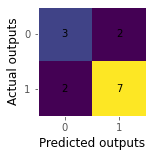

In [7]:
# evaluasi
y_pred = model.predict(features)
print(classification_report(target, y_pred))

# function untuk membuat confusion matrix jadi lebih menarik secara visual
def visualizeCM(cm):    
    nolabels = len(cm)
    fig, ax = plt.subplots(figsize=(nolabels, nolabels))
    ax.imshow(cm)
    ax.grid(False)
    ax.set_xlabel('Predicted outputs', color='black')
    ax.set_ylabel('Actual outputs', color='black')
    ax.xaxis.set(ticks=range(nolabels))
    ax.yaxis.set(ticks=range(nolabels))
    ax.set_ylim(nolabels-0.5, -0.5)
    for i in range(nolabels):
        for j in range(nolabels):
            ax.text(j, i, cm[i, j], ha='center', va='center', color='black')
    plt.show()
    
visualizeCM(confusion_matrix(target, y_pred))

# Naive Bayes dengan data wine

In [8]:
# siapin data
wine = load_wine()
df_wine = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df_wine["label"] = wine.target

In [9]:
df_wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [10]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  label

In [11]:
# data preparation
# missing value, invalid value, tipe data, 
# encoding, scaling, split jadi training dan testing data

# split data jadi training dan testing dataset
x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, random_state=0, test_size=0.2)

print(x_train.shape, x_test.shape)

(142, 13) (36, 13)


In [12]:
# buat dan latih model
model = GaussianNB().fit(x_train, y_train)

              precision    recall  f1-score   support

           0       0.88      1.00      0.93        14
           1       1.00      0.81      0.90        16
           2       0.86      1.00      0.92         6

    accuracy                           0.92        36
   macro avg       0.91      0.94      0.92        36
weighted avg       0.93      0.92      0.92        36



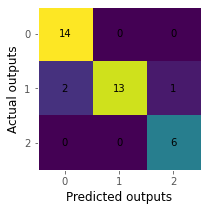

In [13]:
# evaluasi model
y_pred = model.predict(x_test)

print(classification_report(y_test, y_pred))

visualizeCM(confusion_matrix(y_test, y_pred))

# Decision Tree
memilah2 data nya sampai satu subset data punya jenis label yang sama semua.

In [14]:
# siapin data
# misalkan kita gunakan data yang sama dengan sebelumnya, yang wine dataset
# maka step ini sudah selesai
df_wine = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df_wine['target'] = wine.target

df_wine

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [15]:
# explore dan prep data
# split data jadi training dan testing dataset
x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, random_state=0, test_size=0.2)

In [16]:
# buat dan latih model
model_tree = DecisionTreeClassifier().fit(x_train, y_train)
model_tree

DecisionTreeClassifier()

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.94      0.97        16
           2       1.00      1.00      1.00         6

    accuracy                           0.97        36
   macro avg       0.98      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36

[[14  0  0]
 [ 1 15  0]
 [ 0  0  6]]


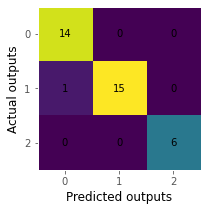

In [17]:
# evaluasi model
y_pred = model_tree.predict(x_test)

print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))
visualizeCM(confusion_matrix(y_test, y_pred))

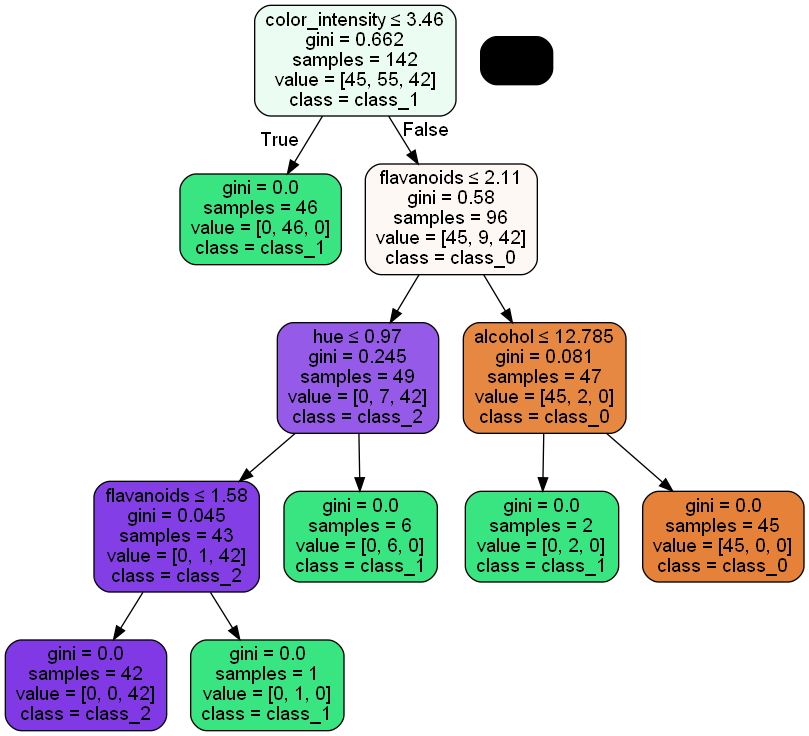

In [18]:
# tuning
# untuk decision tree, kita bisa "prune" potong pohonnya

# visualisasi pohon nya dulu untuk melihat full size nya
dot_data = StringIO()
tree.export_graphviz(model_tree,
                     out_file=dot_data,
                     class_names=["class_0", "class_1", "class_2"],
                     feature_names=wine.feature_names,
                     filled=True,
                     rounded=True,
                     special_characters=True
                    )
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

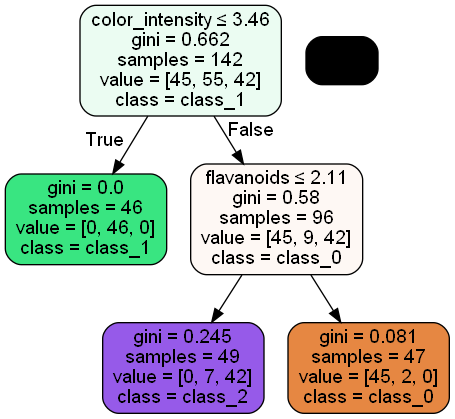

              precision    recall  f1-score   support

           0       0.74      1.00      0.85        14
           1       1.00      0.56      0.72        16
           2       0.75      1.00      0.86         6

    accuracy                           0.81        36
   macro avg       0.83      0.85      0.81        36
weighted avg       0.86      0.81      0.79        36

[[14  0  0]
 [ 5  9  2]
 [ 0  0  6]]


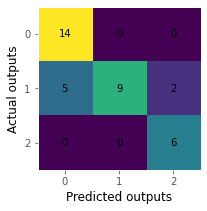

In [19]:
# buat lagi pohonnya dengan max_depth berbeda
# buat dan latih model
model_tree = DecisionTreeClassifier(max_depth=2).fit(x_train, y_train)

dot_data = StringIO()
tree.export_graphviz(model_tree,
                     out_file=dot_data,
                     class_names=["class_0", "class_1", "class_2"],
                     feature_names=wine.feature_names,
                     filled=True,
                     rounded=True,
                     special_characters=True
                    )
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
display(Image(graph.create_png()))

# evaluasi model
y_pred = model_tree.predict(x_test)

print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))
visualizeCM(confusion_matrix(y_test, y_pred))

# Random Forest
banyak decision tree voting untuk buat prediksi

In [20]:
# siapkan data
df_wine

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [21]:
# data prep

# split jadi testing dan training data
x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, random_state=0, test_size=0.2)

print(x_train.shape, x_test.shape)

(142, 13) (36, 13)


In [22]:
# buat dan latih model
# gunakan training data untuk latih model

model_rf = RandomForestClassifier().fit(x_train,y_train)
model_rf

RandomForestClassifier()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.94      0.97        16
           2       0.86      1.00      0.92         6

    accuracy                           0.97        36
   macro avg       0.95      0.98      0.96        36
weighted avg       0.98      0.97      0.97        36

[[14  0  0]
 [ 0 15  1]
 [ 0  0  6]]


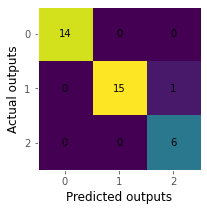

In [23]:
# evaluasi
# evaluasi model
y_pred = model_rf.predict(x_test)

print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))
visualizeCM(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.88      0.93        16
           2       0.86      1.00      0.92         6

    accuracy                           0.94        36
   macro avg       0.93      0.96      0.94        36
weighted avg       0.95      0.94      0.94        36

[[14  0  0]
 [ 1 14  1]
 [ 0  0  6]]


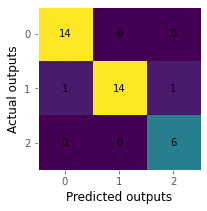

In [24]:
# tuning
# kita bisa edit mau ada berapa pohon di random forest classifier (n_estimators) default 100
# kita juga bisa pilih setiap pohon mau ada (max_depth) berapa, default tidak ada limit

model_rf2 = RandomForestClassifier(max_depth=2, n_estimators=300).fit(x_train,y_train)

# evaluasi model
y_pred = model_rf2.predict(x_test)

print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))
visualizeCM(confusion_matrix(y_test, y_pred))

### Importance sebuah Feature

In [25]:
model_rf2.feature_importances_

array([0.10768913, 0.01873103, 0.00519755, 0.0274592 , 0.01794522,
       0.04860908, 0.15489624, 0.01092333, 0.02622755, 0.1771372 ,
       0.07094791, 0.17816353, 0.15607303])

In [26]:
df_imp = pd.DataFrame({"% importance": model_rf2.feature_importances_}, index= wine.feature_names).sort_values(by="% importance", ascending=False)

df_imp

,% importance
od280/od315_of_diluted_wines,0.178164
color_intensity,0.177137
proline,0.156073
flavanoids,0.154896
alcohol,0.107689
hue,0.070948
total_phenols,0.048609
alcalinity_of_ash,0.027459
proanthocyanins,0.026228
malic_acid,0.018731


<AxesSubplot:>

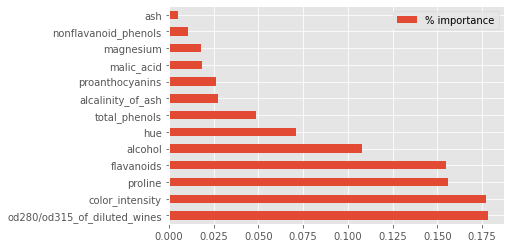

In [27]:
df_imp.plot(kind="barh")

In [28]:
# mencoba membuat model tipe random forest

# Support Vector Machine

In [29]:
# siapin data
# masih menggunakan data wine
df_wine

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [30]:
# prep data
# masih hanya menggunakan split jadi training dan testing data
print(x_train.shape, x_test.shape)

(142, 13) (36, 13)


In [31]:
# membuat dan melatih model machine learning tipe SVC
model_svc = SVC().fit(x_train, y_train)
model_svc

SVC()

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.80      0.75      0.77        16
           2       0.38      0.50      0.43         6

    accuracy                           0.78        36
   macro avg       0.72      0.73      0.72        36
weighted avg       0.81      0.78      0.79        36

[[13  0  1]
 [ 0 12  4]
 [ 0  3  3]]


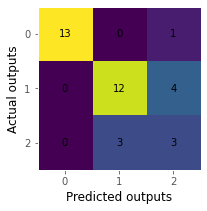

In [32]:
# evaluasi
y_pred = model_svc.predict(x_test)

print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))
visualizeCM(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.94      0.97        16
           2       0.86      1.00      0.92         6

    accuracy                           0.97        36
   macro avg       0.95      0.98      0.96        36
weighted avg       0.98      0.97      0.97        36

[[14  0  0]
 [ 0 15  1]
 [ 0  0  6]]


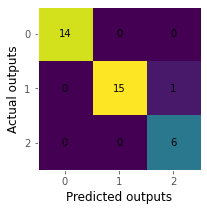

In [33]:
# tuning
model_svc = SVC(kernel="linear").fit(x_train, y_train)

# evaluasi
y_pred = model_svc.predict(x_test)

print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))
visualizeCM(confusion_matrix(y_test, y_pred))

## Latihan: Gunakan data train.csv untuk latihan Classification ML
buat model machine learning untuk setiap tipe algoritma yang sudah di pelajari. 

jangan lupa untuk melakukan evaluasi dengan classification report dan confusion matrix untuk setiap algoritma.

pilih algoritma yang akan kalian gunakan untuk membuat prediksi class di tipe data seperti ini, dan jelaskan kenapa.

data: https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/Final_Dataset/train.csv

- Logistic Regression
- K-Nearest Neighbor
- Naive Bayes
- Decision Tree
- Random Forest
- Support Vector Machine (SVM)

In [34]:
df_train = pd.read_csv("https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/Final_Dataset/train.csv")
df_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


dari semua kolom yang ada, mana yang cocok untuk jadi "target"

data ini banyak background data seseorang, dari dia punya LoanID, gender, sudah married atau belum, lulus sekolah / tidak, kerja /tidak, gaji nya berapa menunjukkan sepertinya ini data tentang aplikasi untuk hutang. Jadi kita akan gunakan Loan_Status sebagai target apakah hutangnya di terima (boleh hutang, Y) atau tidak (N).

In [35]:
# siapin data
# cek missing value, invalid values, data exploration
# encoding, scaling, split data jadi test dan training dataset

print(df_train.shape)

(614, 13)


In [36]:
print(df_train.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [37]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [38]:
# ada missing value, kita akan coba fill dulu yang dependents
df_train["Dependents"].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [39]:
# aku mau isi missing value di kolom Dependents dengan value median nya,
# kita ubah 3+ jadi 3 kemudian cari mediannya dulu
jumlah_anak = df_train["Dependents"].replace({"3+":3})
jumlah_anak.value_counts()

0    345
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [40]:
jumlah_anak.median()

0.0

In [41]:
df_train["Dependents"] = df_train["Dependents"].fillna("0")
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [42]:
# setelah berhasil isi missing value di kolom Dependent dengan value median,
# kita lanjut ke kolom yang lainnya.

# misal kita lihat Gender
df_train["Gender"].value_counts()

# kita bisa pelan2 isi setiap kolom missing value nya dengan median, mode, means, atau kita drop baris2 tersebut

Male      489
Female    112
Name: Gender, dtype: int64

In [75]:
# kita akan drop baris data yang ada missng value
df2 = df_train.dropna()
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 490 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            490 non-null    object 
 1   Gender             490 non-null    object 
 2   Married            490 non-null    object 
 3   Dependents         490 non-null    object 
 4   Education          490 non-null    object 
 5   Self_Employed      490 non-null    object 
 6   ApplicantIncome    490 non-null    int64  
 7   CoapplicantIncome  490 non-null    float64
 8   LoanAmount         490 non-null    float64
 9   Loan_Amount_Term   490 non-null    float64
 10  Credit_History     490 non-null    float64
 11  Property_Area      490 non-null    object 
 12  Loan_Status        490 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 53.6+ KB


In [76]:
df2.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [77]:
df2["Dependents"].value_counts()

0     284
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [78]:
# kolom Dependents value yang 3+ kita ubah jadi 3
df2["Dependents"] = df2["Dependents"].replace({"3+":3})

C:\Users\stefa\AppData\Local\Temp/ipykernel_15144/3774091428.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Dependents"] = df2["Dependents"].replace({"3+":3})


In [79]:
df2["Dependents"].value_counts()

0    284
2     85
1     80
3     41
Name: Dependents, dtype: int64

In [80]:
df2["Dependents"] = df2["Dependents"].astype(int)

C:\Users\stefa\AppData\Local\Temp/ipykernel_15144/657538264.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Dependents"] = df2["Dependents"].astype(int)


In [81]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 490 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            490 non-null    object 
 1   Gender             490 non-null    object 
 2   Married            490 non-null    object 
 3   Dependents         490 non-null    int32  
 4   Education          490 non-null    object 
 5   Self_Employed      490 non-null    object 
 6   ApplicantIncome    490 non-null    int64  
 7   CoapplicantIncome  490 non-null    float64
 8   LoanAmount         490 non-null    float64
 9   Loan_Amount_Term   490 non-null    float64
 10  Credit_History     490 non-null    float64
 11  Property_Area      490 non-null    object 
 12  Loan_Status        490 non-null    object 
dtypes: float64(4), int32(1), int64(1), object(7)
memory usage: 51.7+ KB


In [82]:
# kita lanjut cek data kolum lainnya
df2.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [83]:
# ada bbrp kolom fitur yang perlu di encoding, ubah string jadi integer
en_cols = ["Gender", "Married", "Education", "Self_Employed", "Property_Area"]

le = LabelEncoder()
for col in en_cols:
    df2[col] = le.fit_transform(df2[col])
    print(col, le.classes_)

Gender ['Female' 'Male']
Married ['No' 'Yes']
Education ['Graduate' 'Not Graduate']
Self_Employed ['No' 'Yes']
Property_Area ['Rural' 'Semiurban' 'Urban']


C:\Users\stefa\AppData\Local\Temp/ipykernel_15144/2423291006.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[col] = le.fit_transform(df2[col])


In [84]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 490 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            490 non-null    object 
 1   Gender             490 non-null    int32  
 2   Married            490 non-null    int32  
 3   Dependents         490 non-null    int32  
 4   Education          490 non-null    int32  
 5   Self_Employed      490 non-null    int32  
 6   ApplicantIncome    490 non-null    int64  
 7   CoapplicantIncome  490 non-null    float64
 8   LoanAmount         490 non-null    float64
 9   Loan_Amount_Term   490 non-null    float64
 10  Credit_History     490 non-null    float64
 11  Property_Area      490 non-null    int32  
 12  Loan_Status        490 non-null    object 
dtypes: float64(4), int32(6), int64(1), object(2)
memory usage: 42.1+ KB


In [85]:
# targetnya juga perlu di encoding karena masih bertipe data string
col = "Loan_Status"
df2[col] = le.fit_transform(df2[col])
print(col, le.classes_)

Loan_Status ['N' 'Y']


C:\Users\stefa\AppData\Local\Temp/ipykernel_15144/2971910112.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[col] = le.fit_transform(df2[col])


In [86]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 490 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            490 non-null    object 
 1   Gender             490 non-null    int32  
 2   Married            490 non-null    int32  
 3   Dependents         490 non-null    int32  
 4   Education          490 non-null    int32  
 5   Self_Employed      490 non-null    int32  
 6   ApplicantIncome    490 non-null    int64  
 7   CoapplicantIncome  490 non-null    float64
 8   LoanAmount         490 non-null    float64
 9   Loan_Amount_Term   490 non-null    float64
 10  Credit_History     490 non-null    float64
 11  Property_Area      490 non-null    int32  
 12  Loan_Status        490 non-null    int32  
dtypes: float64(4), int32(7), int64(1), object(1)
memory usage: 40.2+ KB


In [87]:
# Loan ID biasanya unik semua jadi tidak kita gunakan sebagai fitur
df2.nunique()

Loan_ID              490
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      413
CoapplicantIncome    234
LoanAmount           186
Loan_Amount_Term       9
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [88]:
df2.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [89]:
# pisahin features dengan target
features = df2[['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area']]
target = df2['Loan_Status']

print(features.shape, target.shape)

(490, 11) (490,)


In [90]:
# split training dan testing data

x_train, x_test, y_train, y_test = train_test_split(features, target)

print(x_train.shape, x_test.shape)

(367, 11) (123, 11)


In [92]:
# buat model dan latih model
model_lr = LogisticRegression(solver="newton-cg").fit(x_train, y_train)

In [93]:
# evaluasi model

y_pred = model_lr.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.37      0.51        35
           1       0.79      0.97      0.87        88

    accuracy                           0.80       123
   macro avg       0.80      0.67      0.69       123
weighted avg       0.80      0.80      0.77       123



target kita adalah Loan_Status ['N' 'Y'], 0 artinya loan ditolak. 1 artinya loan diterima. recall untuk target 0 sangat rendah di 37% artinya dari semua orang yang harusnya loan nya ditolak kita hanya memprediksi 37% dengan benar.

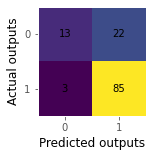

In [95]:

visualizeCM(confusion_matrix(y_test, y_pred))